In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
# df_ASD_0 = pd.read_excel('modified_data\\Agricultural structure data ASD_2010_2016.xlsx', sheet_name=0)
# df_ASD_0.rename(columns={'Name':'Landkreis'}, inplace=True)
# print(df_ASD_0.shape)
# 
df_ASD = pd.read_excel('modified_data\\Agricultural structure data ASD_2010_2016.xlsx', sheet_name=1)
print(df_ASD.shape)
# 
# df_ASD = pd.merge(df_ASD_0, df_ASD_1, on="Landkreis", how='inner')
# print(df_ASD.shape)
# df_ASD.tail()

(401, 67)


In [24]:
df_ASD.tail()

,LKR-ID,Landkreis,KFZ,Fläche [ha],LF gesamt [ha],Anteil LF [%],Lw. Betriebe gesamt,Betriebe bis 5 ha,Betriebe 5-20 ha,Betriebe 20-50 ha,...,Betriebe Öko-LF,Betriebe Öko-LF umgest.,Betriebe Öko-LF in Umst.,LF ökologisch [ha],LW-Fläche unter 5 ha,LW-Fläche 10-20 ha,LW-Fläche 20-50 ha,LW-Fläche 50-100 ha,LW-Fläche 100-200 ha,LW-Fläche über 200 ha
396,16074,LK Saale-Holzland-Kreis,SHK,79079.7919,39601,50.1,204,11,91,31,...,13,0,0,745,21,903,966,1210,2131,34370
397,16075,LK Saale-Orla-Kreis,SOK,111832.3884,50506,45.2,273,20,112,46,...,24,2219,0,3486,47,1091,1401,1329,3050,43588
398,16076,LK Greiz,GRZ,81921.7444,46620,56.9,324,22,142,40,...,15,412,98,511,33,1440,1193,2191,5896,35867
399,16077,LK Altenburger Land,ABG,55201.4996,36710,66.5,194,23,64,21,...,9,1401,0,1634,33,656,711,953,2782,31573
400,3159,LK Göttingen,GÖ,170265.9817,72975,42.9,970,44,332,195,...,55,3755,237,4418,91,3738,6442,12481,20213,30009


In [25]:
df_company = pd.read_excel('modified_data\\Company_Sales by_ZIPcode_2017_2018.xlsx')
df_company.rename(columns={'LandKreis Name':'Landkreis'}, inplace=True)
print(df_company.shape)
df_company.tail()

(326, 2)


,LKR-ID,Number of machinery
321,10042,6
322,10041,2
323,(blank),1
324,NaN,3
325,總計,16526


In [26]:
df_Vehicle = pd.read_excel('modified_data\\Vehicle Registration Consolidated.xlsx', sheet_name = 1)
df_Vehicle.tail()

,LKR-ID,Sum of Number of Tractors
398,16075,611
399,16076,839
400,16077,376
401,90069,1
402,90070,7


In [27]:
print("Vehicle shape =", df_Vehicle.shape)
print("df_ASD shape =", df_ASD.shape)
print("df_company shape =", df_company.shape)

Vehicle shape = (403, 2)
df_ASD shape = (401, 67)
df_company shape = (326, 2)


In [28]:
df_company['LKR-ID']=df_company['LKR-ID'].astype(str)
df_ASD['LKR-ID']=df_ASD['LKR-ID'].astype(str)
df_Merge_ASDnCompany = pd.merge(df_ASD, df_company, on="LKR-ID", how='left')
print(df_Merge_ASDnCompany.shape)
df_Merge_ASDnCompany.tail()
# ? should find out what are the missing data

(401, 68)


,LKR-ID,Landkreis,KFZ,Fläche [ha],LF gesamt [ha],Anteil LF [%],Lw. Betriebe gesamt,Betriebe bis 5 ha,Betriebe 5-20 ha,Betriebe 20-50 ha,...,Betriebe Öko-LF umgest.,Betriebe Öko-LF in Umst.,LF ökologisch [ha],LW-Fläche unter 5 ha,LW-Fläche 10-20 ha,LW-Fläche 20-50 ha,LW-Fläche 50-100 ha,LW-Fläche 100-200 ha,LW-Fläche über 200 ha,Number of machinery
396,16074,LK Saale-Holzland-Kreis,SHK,79079.7919,39601,50.1,204,11,91,31,...,0,0,745,21,903,966,1210,2131,34370,8.0
397,16075,LK Saale-Orla-Kreis,SOK,111832.3884,50506,45.2,273,20,112,46,...,2219,0,3486,47,1091,1401,1329,3050,43588,12.0
398,16076,LK Greiz,GRZ,81921.7444,46620,56.9,324,22,142,40,...,412,98,511,33,1440,1193,2191,5896,35867,27.0
399,16077,LK Altenburger Land,ABG,55201.4996,36710,66.5,194,23,64,21,...,1401,0,1634,33,656,711,953,2782,31573,30.0
400,3159,LK Göttingen,GÖ,170265.9817,72975,42.9,970,44,332,195,...,3755,237,4418,91,3738,6442,12481,20213,30009,34.0


In [29]:
df_Merge_ASDnCompany['LKR-ID']=df_Merge_ASDnCompany['LKR-ID'].astype(int)
df_Merge_ASDnVehiclenCompany = pd.merge(df_Merge_ASDnCompany, df_Vehicle, on="LKR-ID", how='inner')
print(df_Merge_ASDnVehiclenCompany.shape)
df_Merge_ASDnVehiclenCompany.tail()
# # ? should find out what are the missing data

(401, 69)


,LKR-ID,Landkreis,KFZ,Fläche [ha],LF gesamt [ha],Anteil LF [%],Lw. Betriebe gesamt,Betriebe bis 5 ha,Betriebe 5-20 ha,Betriebe 20-50 ha,...,Betriebe Öko-LF in Umst.,LF ökologisch [ha],LW-Fläche unter 5 ha,LW-Fläche 10-20 ha,LW-Fläche 20-50 ha,LW-Fläche 50-100 ha,LW-Fläche 100-200 ha,LW-Fläche über 200 ha,Number of machinery,Sum of Number of Tractors
396,16074,LK Saale-Holzland-Kreis,SHK,79079.7919,39601,50.1,204,11,91,31,...,0,745,21,903,966,1210,2131,34370,8.0,527
397,16075,LK Saale-Orla-Kreis,SOK,111832.3884,50506,45.2,273,20,112,46,...,0,3486,47,1091,1401,1329,3050,43588,12.0,611
398,16076,LK Greiz,GRZ,81921.7444,46620,56.9,324,22,142,40,...,98,511,33,1440,1193,2191,5896,35867,27.0,839
399,16077,LK Altenburger Land,ABG,55201.4996,36710,66.5,194,23,64,21,...,0,1634,33,656,711,953,2782,31573,30.0,376
400,3159,LK Göttingen,GÖ,170265.9817,72975,42.9,970,44,332,195,...,237,4418,91,3738,6442,12481,20213,30009,34.0,1325


In [30]:
# just checking that there's no missing data missing...
# df_Merge_ASDnVehiclenCompany.isnull().sum().max() 
print("NAs for numerical features in train : " + str(df_Merge_ASDnVehiclenCompany.isnull().values.sum()))
df_Merge_ASDnVehiclenCompany = df_Merge_ASDnVehiclenCompany.fillna(0)
print("Remaining NAs for numerical features in train : " + str(df_Merge_ASDnVehiclenCompany.isnull().values.sum()))

NAs for numerical features in train : 79
Remaining NAs for numerical features in train : 0


In [31]:
df_Merge_ASDnVehiclenCompany.to_excel("df_Merge_ASDnVehiclenCompany.xlsx")

In [32]:
# # !! should transfer categorical data into numerical data
# # 1. if two features are related to each other, pick up the one which has higher value of correlation (twin brother effect)
# # 2. if 'year' is relevant to dependent variable, then we need to take time series analysis into account
# corrmat = df_Merge_ASDnCompany.corr()
# colormap = plt.cm.RdBu
# plt.figure(figsize=(14, 12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(corrmat, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [33]:
# drop fully correlated data
correlated_labels = ['LW-Fläche 50-100 ha', '2016- Lw. Betriebe ges.']
# df_Merge_ASDnVehiclenCompany.drop(columns=correlated_labels, axis=1, inplace=True)

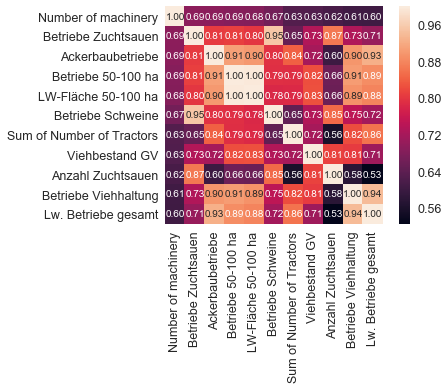

Index(['Number of machinery', 'Betriebe Zuchtsauen', 'Ackerbaubetriebe',
       'Betriebe 50-100 ha', 'LW-Fläche 50-100 ha', 'Betriebe Schweine',
       'Sum of Number of Tractors', 'Viehbestand GV', 'Anzahl Zuchtsauen',
       'Betriebe Viehhaltung', 'Lw. Betriebe gesamt'],
      dtype='object')


In [34]:
# number of machinery sales correlation matrix
corrmat = df_Merge_ASDnVehiclenCompany.corr()
k = 11 # number of variables for heatmap
cols = corrmat.nlargest(k, 'Number of machinery')['Number of machinery'].index
cm = np.corrcoef(df_Merge_ASDnVehiclenCompany[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
cm = np.corrcoef(df_Merge_ASDnVehiclenCompany[cols].values.T)
print(cols)

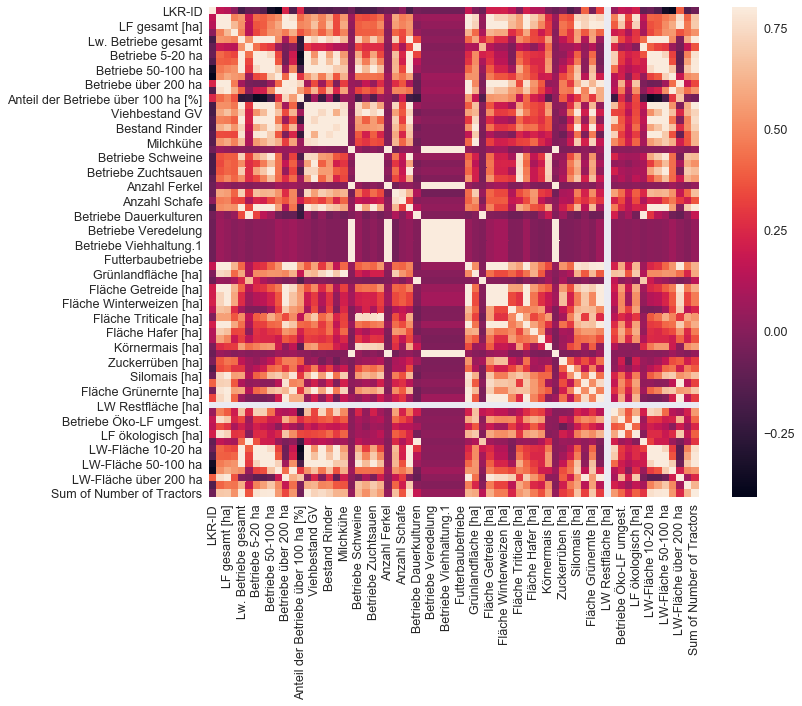

In [35]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Betriebe Zuchtsauen/ breeding cows Farms/ Number of farms containing breeding cows
Ackerbaubetriebe/ Arable farms/ Number of farms suitable for cultivation


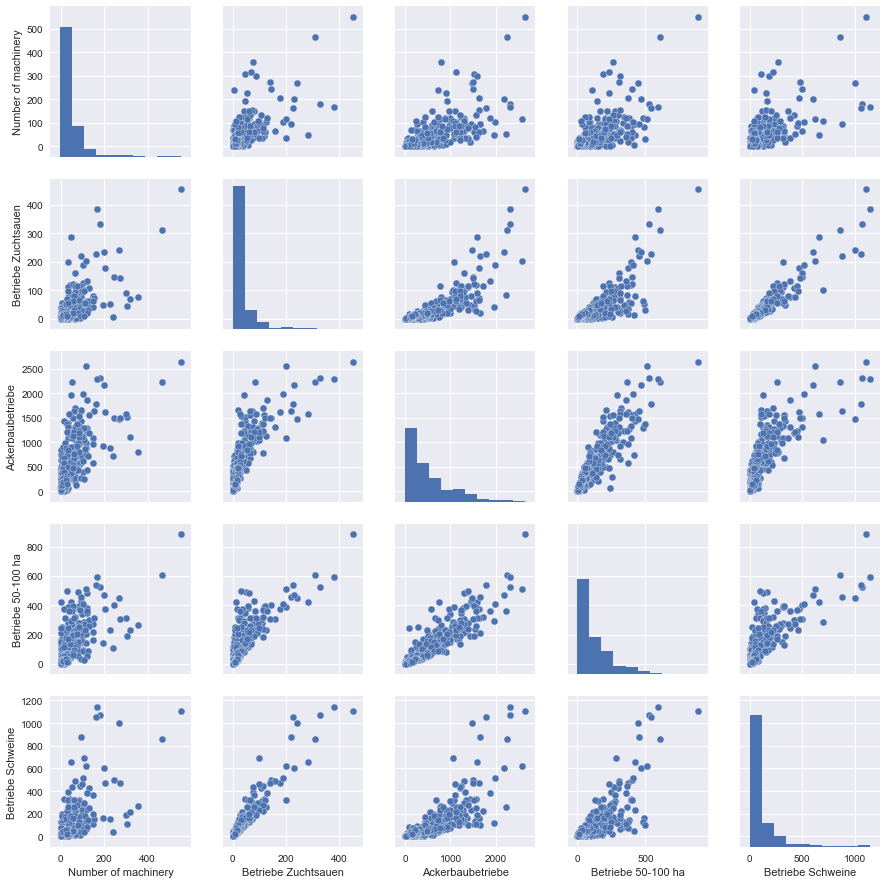

In [36]:
# scatterplot
sns.set()
cols = ['Number of machinery', 'Betriebe Zuchtsauen', 'Ackerbaubetriebe',
       'Betriebe 50-100 ha', 'Betriebe Schweine']
sns.pairplot(df_Merge_ASDnVehiclenCompany[cols])
plt.show()

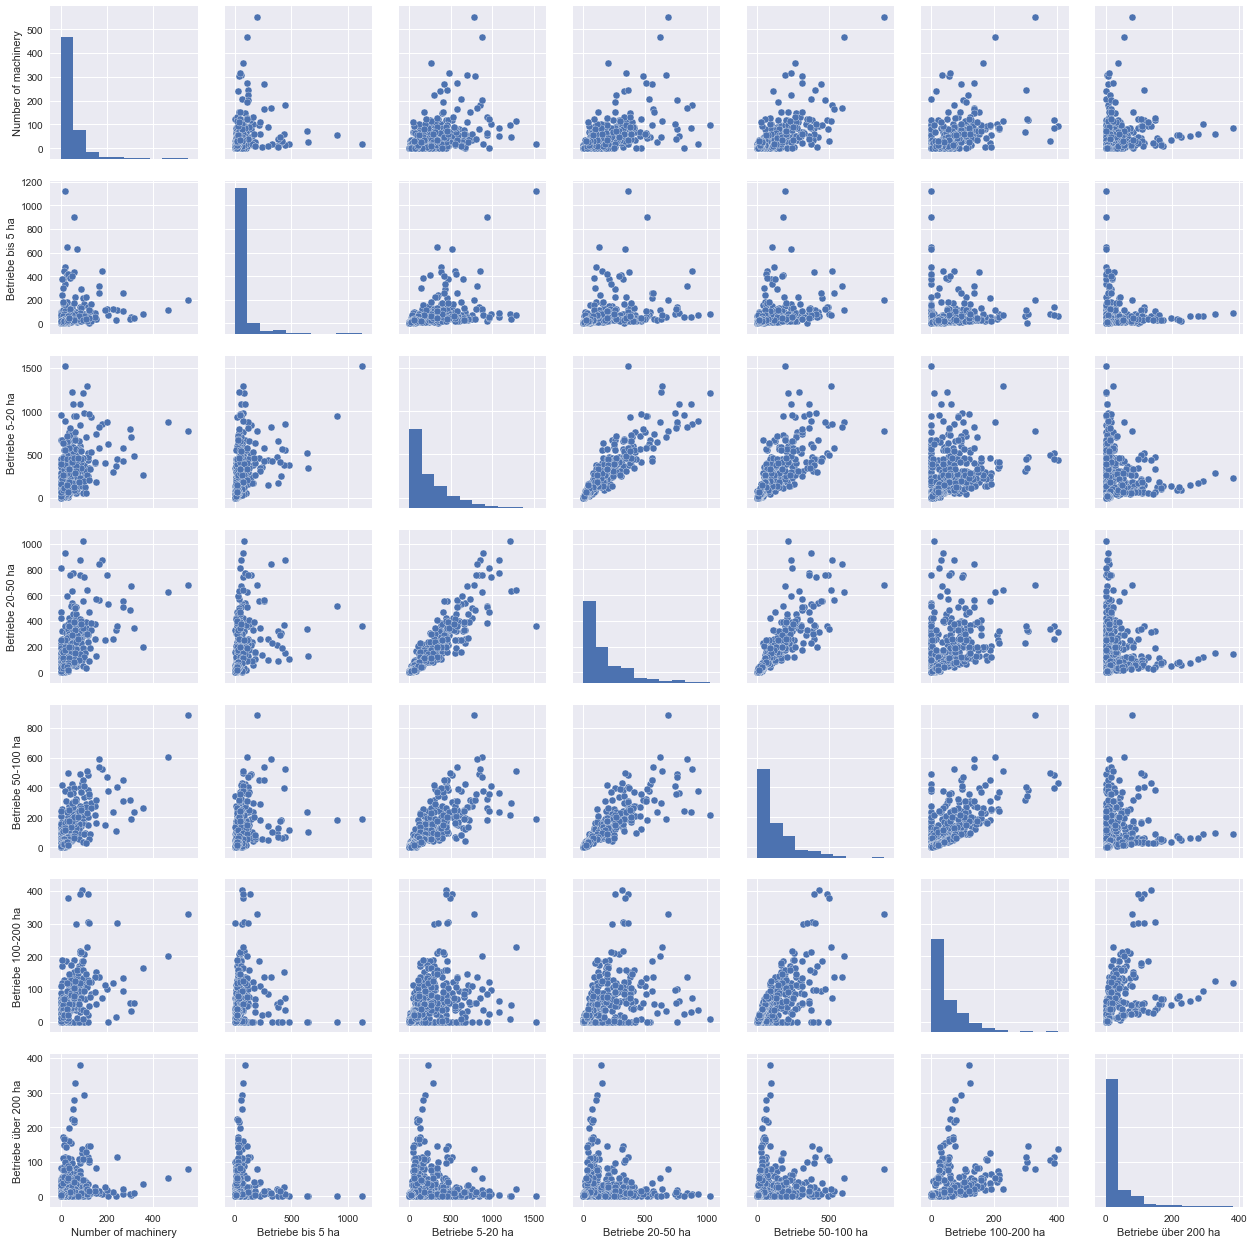

In [37]:
# scatterplot
sns.set()
cols = ['Number of machinery', 'Betriebe bis 5 ha', 'Betriebe 5-20 ha', 'Betriebe 20-50 ha',
       'Betriebe 50-100 ha', 'Betriebe 100-200 ha', 'Betriebe über 200 ha']
sns.pairplot(df_Merge_ASDnVehiclenCompany[cols])
plt.show()

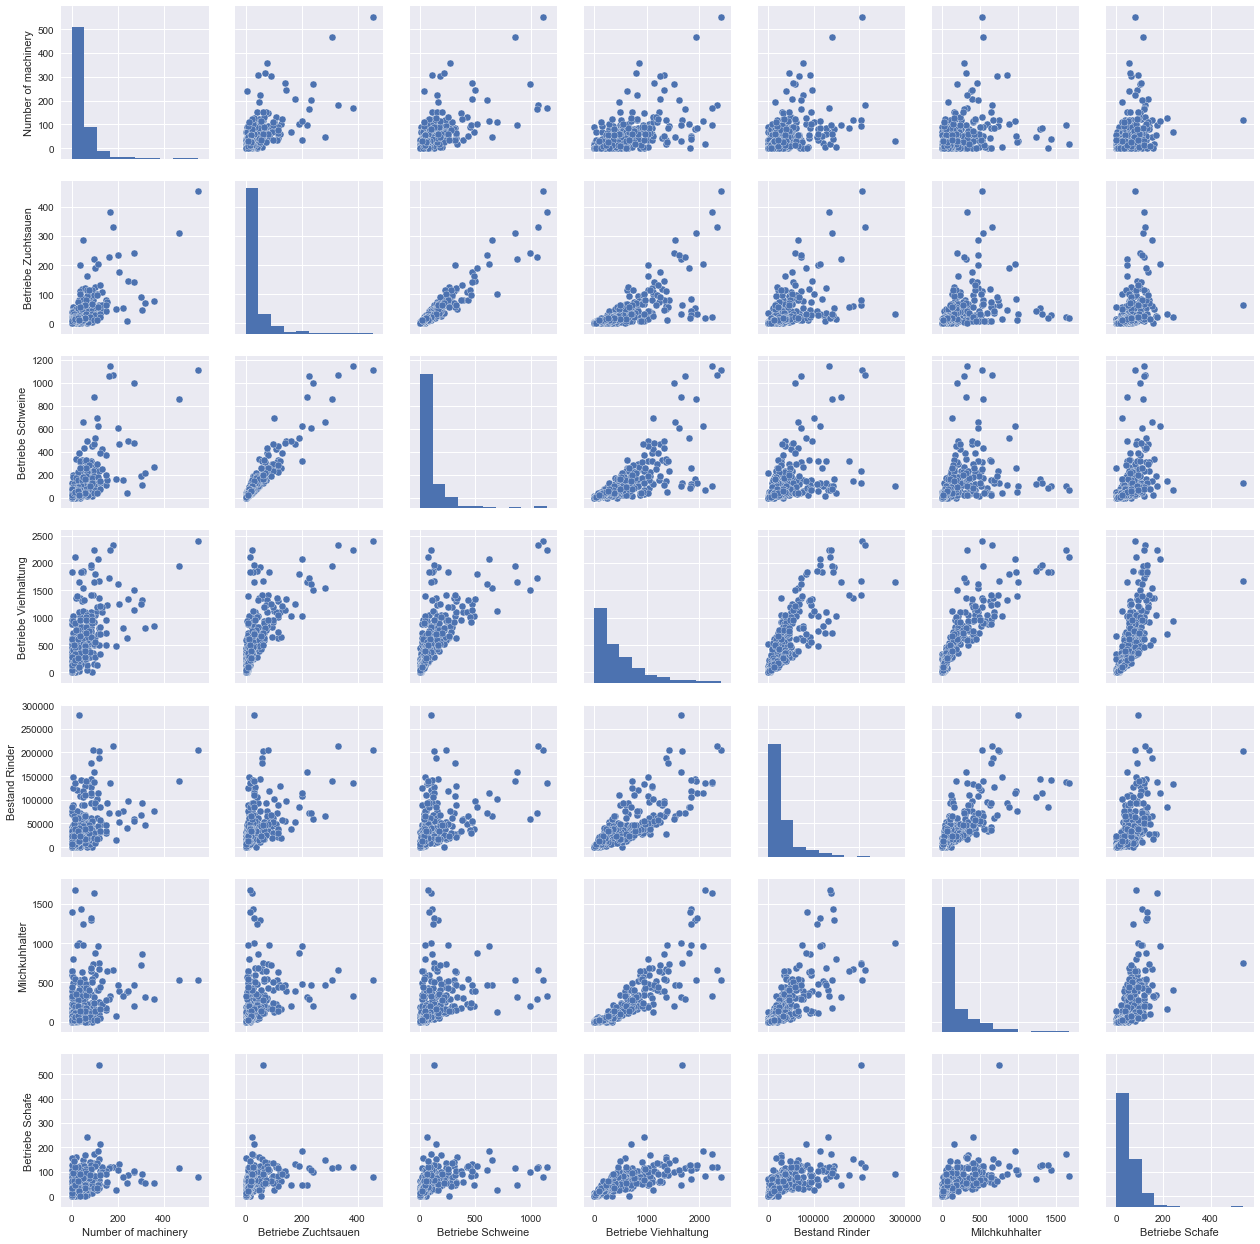

In [38]:
# scatterplot
sns.set()
cols = ['Number of machinery', 'Betriebe Zuchtsauen', 'Betriebe Schweine', 'Betriebe Viehhaltung', 'Bestand Rinder', 'Milchkuhhalter',
       'Betriebe Schafe']
sns.pairplot(df_Merge_ASDnVehiclenCompany[cols])
plt.show()

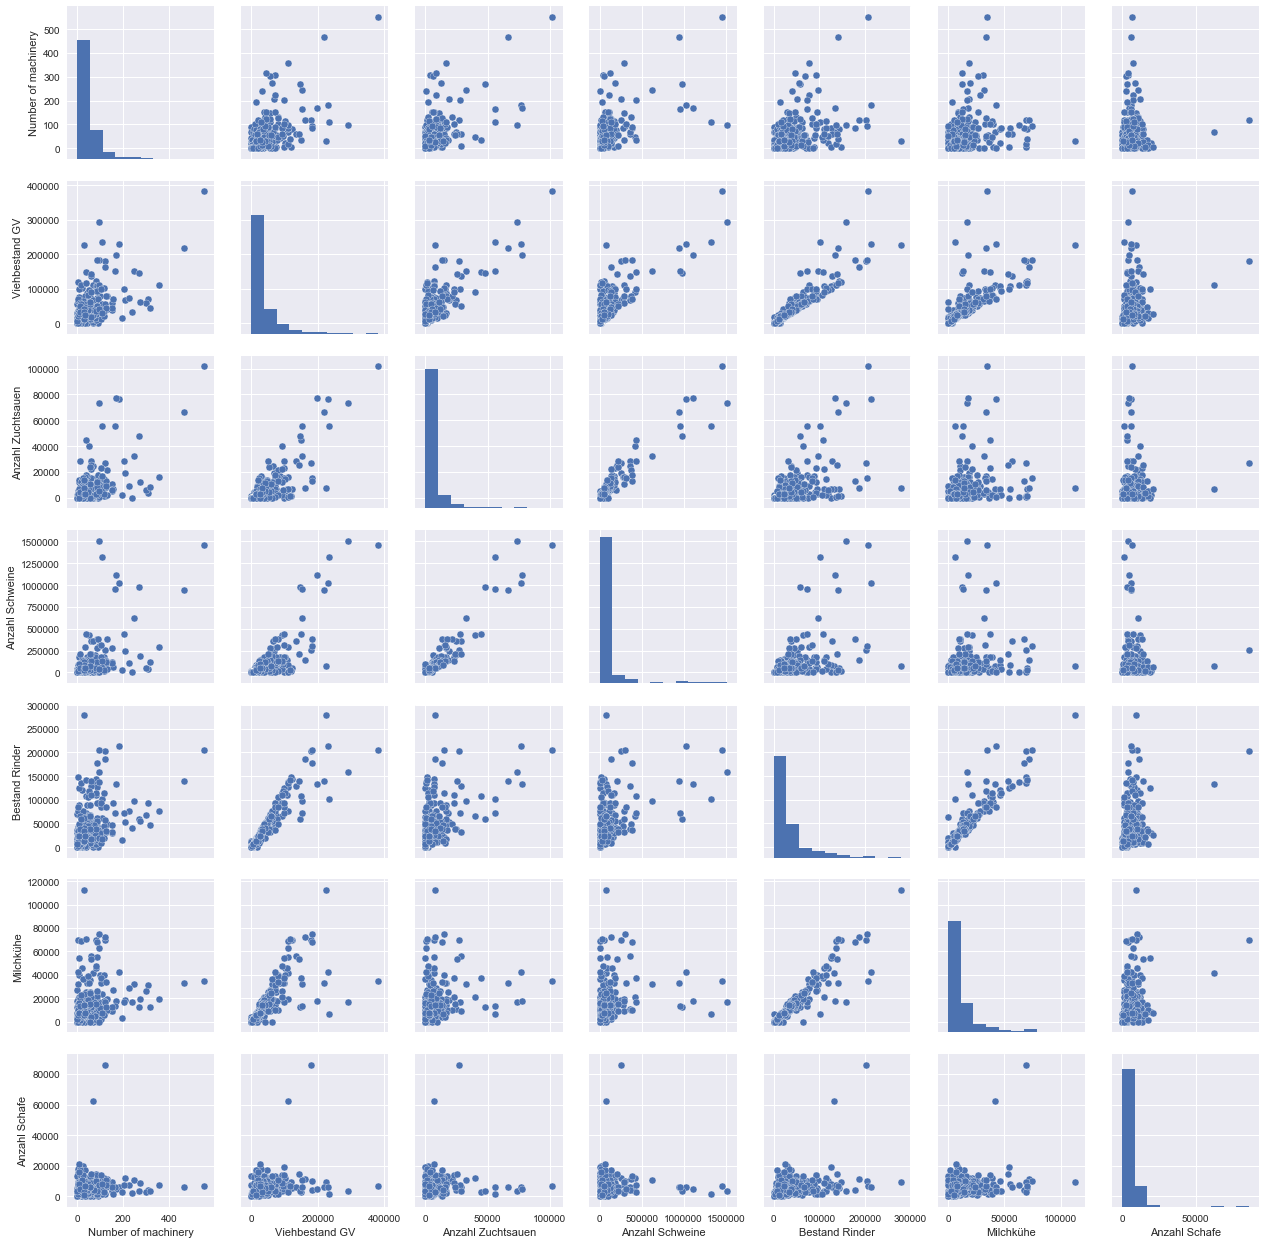

In [39]:
# scatterplot
sns.set()
# 'Anzahl Kälber', 'Anzahl Ferkel', These are missing data
cols = ['Number of machinery', 'Viehbestand GV', 'Anzahl Zuchtsauen',
        'Anzahl Schweine', 'Bestand Rinder','Milchkühe', 'Anzahl Schafe']
sns.pairplot(df_Merge_ASDnVehiclenCompany[cols])
plt.show()

### According to our crystal ball, there are the variables most correlated with sum of total. My thoughts on this
####

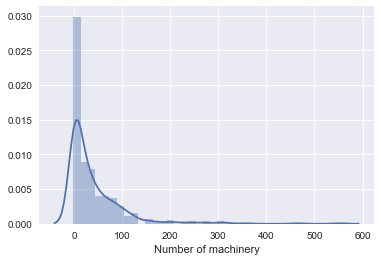

In [40]:
#histogram
sns.distplot(df_Merge_ASDnVehiclenCompany['Number of machinery']);

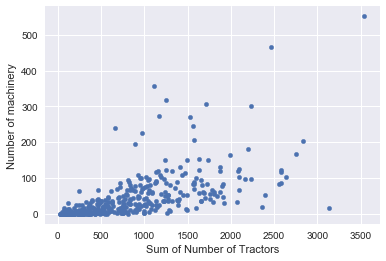

In [41]:
#bivariate analysis saleprice/grlivarea
var = 'Sum of Number of Tractors'
data = pd.concat([df_Merge_ASDnVehiclenCompany['Number of machinery'], df_Merge_ASDnVehiclenCompany[var]], axis=1)
data.plot.scatter(x=var, y='Number of machinery');
# data.plot.scatter(x=var, y='Number of machinery', ylim=(0,400));